# Examples with the Molecular lines

In [19]:
%matplotlib inline

In [1]:
# imports
import numpy as np
from astropy import units as u

from linetools.lists.linelist import LineList
from linetools.spectralline import AbsLine
from linetools.analysis.voigt import voigt_from_abslines

## Load H2

In [2]:
h2 = LineList('H2')
h2

<LineList: H2; 397 transitions sorted by ['wrest'].>

### Show some data

In [3]:
h2._data[0:5]

A,el,nj,nk,group,name,Ek,f,wrest,Ref,mol,Ej,Am,ion,Ex,Jj,Jk,Z,gk,gj,gamma,Id
1 / s,,,,,,1 / cm,,Angstrom,,,1 / cm,,,1 / cm,,,,,,1 / s,
float64,int64,int64,int64,int64,str12,float64,float64,float64,str14,str2,float64,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64
--,2,19,0,8,B19-0P(1),--,0.001315,911.967,Abgrall93,H2,--,--,--,--,0.0,1.0,--,9,--,--,0
--,3,6,0,8,C6-0P(5),--,0.0006844,912.186,Abgrall93,H2,--,--,--,--,4.0,5.0,--,33,--,--,1
--,2,20,0,8,B20-0R(4),--,0.002472,912.235,Abgrall93,H2,--,--,--,--,5.0,4.0,--,9,--,--,2
--,2,19,0,8,B19-0R(2),--,0.002015,912.95,Abgrall93,H2,--,--,--,--,3.0,2.0,--,5,--,--,3
--,2,20,0,8,B20-0P(4),--,0.001162,913.605,Abgrall93,H2,--,--,--,--,3.0,4.0,--,9,--,--,4


## Generate a line

In [4]:
h2_B3_0P3 = AbsLine('B3-0P(3)', linelist=h2)

In [5]:
h2_B3_0P3

<AbsLine: B3-0P(3), z=0.0000 wrest=1070.1410 Angstrom, f=0.007537>

## Generate a model

### Attributes

In [6]:
h2_B3_0P3.attrib['N'] = 10**14./u.cm**2  # log N
h2_B3_0P3.attrib['b'] = 25.*u.km/u.s
h2_B3_0P3.setz(2.)
h2_B3_0P3

<AbsLine: B3-0P(3), z=2.0000 wrest=1070.1410 Angstrom, f=0.007537>

### Spectrum

In [10]:
wave = np.arange(3000., 3600., 0.04) * u.AA

### Model

In [11]:
vmodel = voigt_from_abslines(wave, h2_B3_0P3, fwhm=3.)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:187: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:188: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


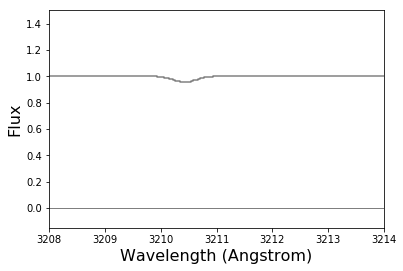

In [20]:
vmodel.plot(xlim=[3208.,3214.])